In [1]:
print("LKJ")

LKJ


In [8]:
import csv
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.BRICS import BRICSDecompose

def generate_fingerprints_and_fragments(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    
    # Generate Morgan fingerprint
    fp = AllChem.GetMorganFingerprint(mol, 2)
    
    # Generate fragments using BRICS decomposition
    fragments = list(BRICSDecompose(mol))
    import IPython; IPython.embed();
    # Convert fragments to canonical SMILES
    fragment_smiles = [Chem.MolToSmiles(Chem.MolFromSmiles(frag), canonical=True) for frag in fragments]
    
    return list(set(fragment_smiles))  # Remove duplicates

def process_smiles_list(smiles_list):
    result = {}
    for smiles in smiles_list:
        fragments = generate_fingerprints_and_fragments(smiles)
        if fragments is not None:
            result[smiles] = fragments
    return result

def process_csv_file(file_path):
    smiles_list = []
    with open(file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if 'SMILES' in row:
                smiles_list.append(row['SMILES'])
    return process_smiles_list(smiles_list)

# Example usage
if __name__ == "__main__":
    # Process a list of SMILES
    smiles_list = ["CC(=O)OC1=CC=CC=C1C(=O)O", "CCO", "c1ccccc1"]
    result_list = process_smiles_list(smiles_list)
    print("Results from SMILES list:")
    for smiles, fragments in result_list.items():
        print(f"SMILES: {smiles}")
        print(f"Fragments: {fragments}\n")

    # Process a CSV file
    csv_file_path = "/projects/cc/knlr326/1_NMR_project/2_Notebooks/MMT_explainability/trash_folder/ML_NMR_5M_XL_13C_test_10x100.csv"
    result_csv = process_csv_file(csv_file_path)
    print("\nResults from CSV file:")
    for smiles, fragments in result_csv.items():
        print(f"SMILES: {smiles}")
        print(f"Fragments: {fragments}\n")

Python 3.7.6 | packaged by conda-forge | (default, Jun  1 2020, 18:57:50) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.15.0 -- An enhanced Interactive Python. Type '?' for help.



In [3]:
dict_ = generate_fingerprints("/projects/cc/knlr326/1_NMR_project/2_Notebooks/MMT_explainability/trash_folder/ML_NMR_5M_XL_13C_test_10x100.csv")

In [4]:
dict_

{'C#CCCCCC(=O)N[C@@H]1CCc2nc(NC(=O)CN)sc2C1': ['C#CCCCCC(=O)N[C@@H]1CCc2nc(NC(=O)CN)sc2C1'],
 'CCOCCC(=O)N(C)C[C@H]1CCN1C(=O)CCC(F)F': ['CCOCCC(=O)N(C)C[C@H]1CCN1C(=O)CCC(F)F'],
 'COc1cccc(CC(=O)NC[C@H](C)N(C)C(=O)C(C)=C2CCC2)c1': ['COc1cccc(CC(=O)NC[C@H](C)N(C)C(=O)C(C)=C2CCC2)c1'],
 'C=C(C)CCC(=O)N1C[C@@H](NCC(=O)N(CC)CC(=C)C)C[C@@H]1C': ['C=C(C)CCC(=O)N1C[C@@H](NCC(=O)N(CC)CC(=C)C)C[C@@H]1C'],
 'C[C@H](NC(=O)CCCCC(N)=O)C1CN([C@H](C)c2csnn2)C1': ['C[C@H](NC(=O)CCCCC(N)=O)C1CN([C@H](C)c2csnn2)C1'],
 'C#CCNCC1(NC(=O)c2cncnc2C)CCCCC1': ['C#CCNCC1(NC(=O)c2cncnc2C)CCCCC1'],
 'O=C(C1CC=CC1)N1CCC[C@](CO)(NCc2cncc(F)c2)C1': ['O=C(C1CC=CC1)N1CCC[C@](CO)(NCc2cncc(F)c2)C1'],
 'CCCC(=O)NCC1(NCC2CC(F)(F)C2)CC1': ['CCCC(=O)NCC1(NCC2CC(F)(F)C2)CC1'],
 'CC/C=C(/C)C(=O)NC[C@@H]1CCN1C/C=C\\Cl': ['CC/C=C(/C)C(=O)NC[C@@H]1CCN1C/C=C\\Cl'],
 'CC[C@@H]1CN(C(=O)C2(C(F)F)CC2)CC[C@@H]1NCCOC1CCC1': ['CC[C@@H]1CN(C(=O)C2(C(F)F)CC2)CC[C@@H]1NCCOC1CCC1'],
 'CCc1cnc(CNCC[C@H](C)NC(=O)c2scnc2C2CC2)o1': ['CCc1cnc(CN

### Save Molecule images

In [ ]:
"/projects/cc/knlr326/1_NMR_project/1_NMR_data_AZ/9_ZINC_250k/1H_ZINC_v1.csv"

In [4]:
import os
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

def smiles_to_png(csv_file, output_folder, seed=None, image_size=(1000, 1000), dpi=300):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Read the CSV file using pandas
    df = pd.read_csv(csv_file)
    
    # Ensure the 'SMILES' column exists
    if 'SMILES' not in df.columns:
        raise ValueError("The CSV file must contain a 'SMILES' column")

    df_randomized = df.sample(frac=1, random_state=seed).reset_index(drop=True)       

    # Process each row
    for i, smiles in enumerate(df['SMILES']):
        # Convert SMILES to mol
        mol = Chem.MolFromSmiles(smiles)
        
        if mol is not None:
            # Generate a 2D depiction of the molecule
            img = Draw.MolToImage(mol, size=image_size)
            
            # Save the image as PNG
            output_path = os.path.join(output_folder, f"molecule_{i+1}.png")
            img.save(output_path, dpi=(dpi, dpi))
            print(f"Saved {output_path}")
        else:
            print(f"Failed to convert SMILES to molecule: {smiles}")
        if i==30:
            break
            
# Example usage
csv_file = "/projects/cc/knlr326/1_NMR_project/1_NMR_data_AZ/9_ZINC_250k/1H_ZINC_v1.csv"
output_folder = '/projects/cc/knlr326/1_NMR_project/1_NMR_data_AZ/9_ZINC_250k/mol_pngs'
smiles_to_png(csv_file, output_folder, seed=42)


Saved /projects/cc/knlr326/1_NMR_project/1_NMR_data_AZ/9_ZINC_250k/mol_pngs/molecule_1.png
Saved /projects/cc/knlr326/1_NMR_project/1_NMR_data_AZ/9_ZINC_250k/mol_pngs/molecule_2.png
Saved /projects/cc/knlr326/1_NMR_project/1_NMR_data_AZ/9_ZINC_250k/mol_pngs/molecule_3.png
Saved /projects/cc/knlr326/1_NMR_project/1_NMR_data_AZ/9_ZINC_250k/mol_pngs/molecule_4.png
Saved /projects/cc/knlr326/1_NMR_project/1_NMR_data_AZ/9_ZINC_250k/mol_pngs/molecule_5.png
Saved /projects/cc/knlr326/1_NMR_project/1_NMR_data_AZ/9_ZINC_250k/mol_pngs/molecule_6.png
Saved /projects/cc/knlr326/1_NMR_project/1_NMR_data_AZ/9_ZINC_250k/mol_pngs/molecule_7.png
Saved /projects/cc/knlr326/1_NMR_project/1_NMR_data_AZ/9_ZINC_250k/mol_pngs/molecule_8.png
Saved /projects/cc/knlr326/1_NMR_project/1_NMR_data_AZ/9_ZINC_250k/mol_pngs/molecule_9.png
Saved /projects/cc/knlr326/1_NMR_project/1_NMR_data_AZ/9_ZINC_250k/mol_pngs/molecule_10.png
Saved /projects/cc/knlr326/1_NMR_project/1_NMR_data_AZ/9_ZINC_250k/mol_pngs/molecule_11.p

### Plot a t-SNE

Plot saved as /projects/cc/knlr326/1_NMR_project/1_NMR_data_AZ/9_ZINC_250k/T-SNE/t_sne.png


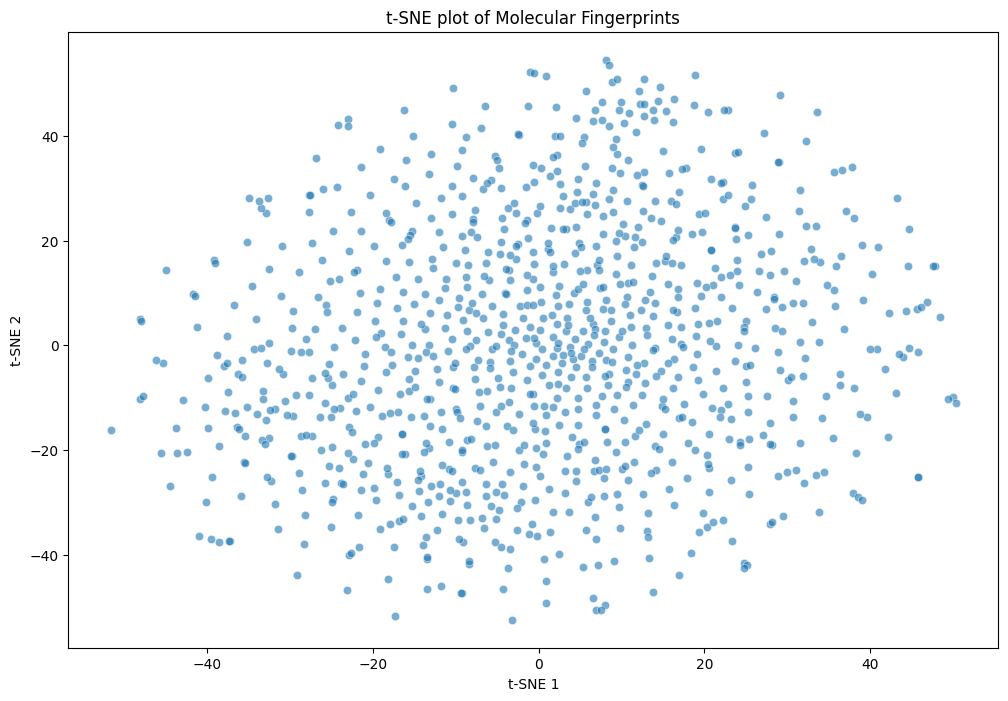

In [4]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

def generate_fingerprints(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    return None

def smiles_tsne_plot(csv_file, output_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Ensure the 'SMILES' column exists
    if 'SMILES' not in df.columns:
        raise ValueError("The CSV file must contain a 'SMILES' column")

    # Generate fingerprints
    fingerprints = [generate_fingerprints(smiles) for smiles in df['SMILES']]
    
    # Remove None values (failed fingerprint generation)
    valid_fingerprints = [fp for fp in fingerprints if fp is not None]
    
    # Convert fingerprints to numpy array
    X = np.array(valid_fingerprints)

    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Create a DataFrame with t-SNE results
    df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])

    # Plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', alpha=0.6)
    plt.title('t-SNE plot of Molecular Fingerprints')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    
    # Save the plot
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"Plot saved as {output_file}")
          
# Example usage
csv_file = "/projects/cc/knlr326/1_NMR_project/1_NMR_data_AZ/9_ZINC_250k/1H_ZINC_v1.csv"
output_file = '/projects/cc/knlr326/1_NMR_project/1_NMR_data_AZ/9_ZINC_250k/T-SNE/t_sne.png'
smiles_tsne_plot(csv_file, output_file)